In [201]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

## Mylar Balloon (shape)

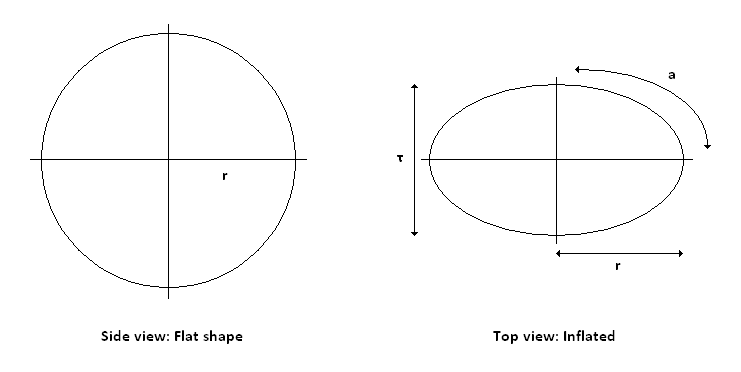

In [202]:
Image(filename="Mylar balloon shape.png")

$V=\frac{2}{3}\pi a r^2$

$\tau\approx 0.599\times2r$

$\frac{a}{r}\approx1.311$

In [203]:
# Material
thickness = 0.000040  # m
density = 945         # kg/m^3

# Envelope
diameter = 1.84       # m

print "Diameter:\t{0:.3f}\tm".format(diameter)
print "Volume:\t\t{0:.3f}\tm^3".format(diameter**3 * np.pi / 20.625)
print "Mass:\t\t{0:.3f}\tkg".format(0.5 * diameter**2 * thickness * np.pi * density)

Diameter:	1.840	m
Volume:		0.949	m^3
Mass:		0.201	kg


In [204]:
Xvalues = []
Volume = []
Mass = []

for x in range(26):
    Xvalues.append(0.5 + x * 0.1)
    
for x in Xvalues:
    Volume.append(((x / 2 / 1.311) ** 2) * (x / 2 * np.pi * 2 / 3))
    Mass.append(((x / 2) ** 2) * np.pi * 2 * density * thickness)
    
print("Diameter(m)   Volume(m^3)   Mass(kg)")
for a, b, c in zip(Xvalues[0:30], Volume[0:30], Mass[0:30]):
    print("%0.3f         %0.3f         %0.3f" % (a, b, c))

Diameter(m)   Volume(m^3)   Mass(kg)
0.500         0.019         0.015
0.600         0.033         0.021
0.700         0.052         0.029
0.800         0.078         0.038
0.900         0.111         0.048
1.000         0.152         0.059
1.100         0.203         0.072
1.200         0.263         0.086
1.300         0.335         0.100
1.400         0.418         0.116
1.500         0.514         0.134
1.600         0.624         0.152
1.700         0.748         0.172
1.800         0.888         0.192
1.900         1.045         0.214
2.000         1.219         0.238
2.100         1.411         0.262
2.200         1.622         0.287
2.300         1.853         0.314
2.400         2.106         0.342
2.500         2.380         0.371
2.600         2.677         0.401
2.700         2.998         0.433
2.800         3.344         0.466
2.900         3.715         0.499
3.000         4.113         0.534


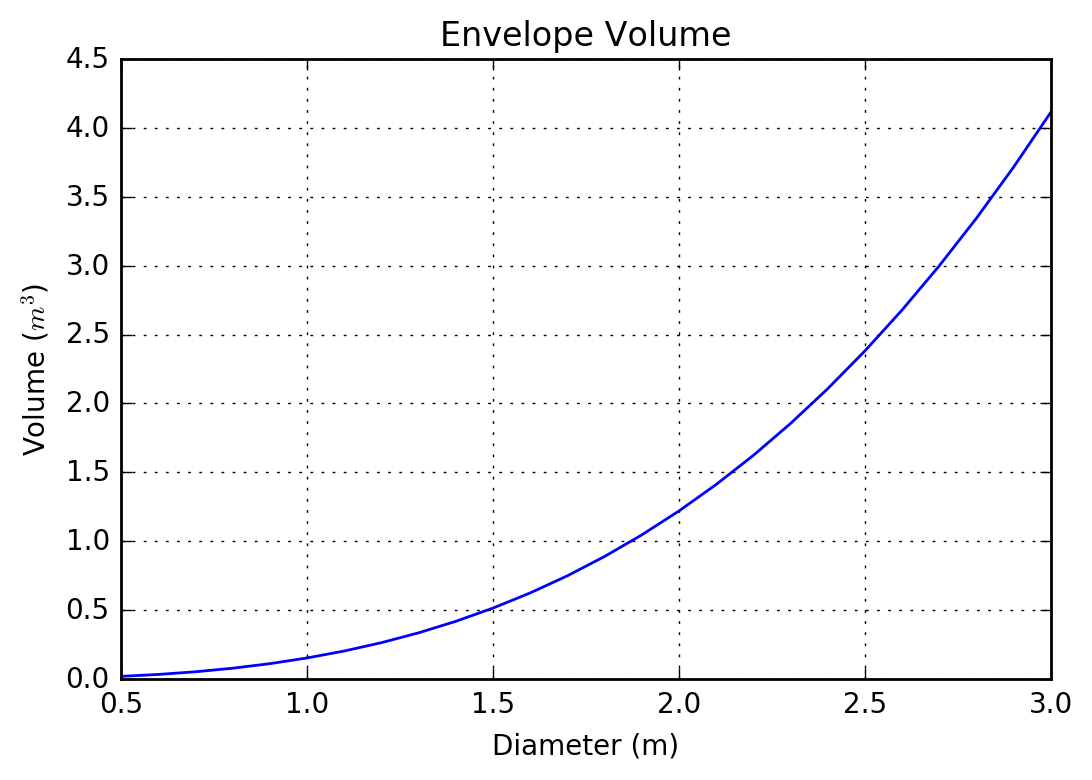

In [205]:
plt.plot(Xvalues, Volume)
plt.title('Envelope Volume')
plt.xlabel('Diameter (m)')
plt.ylabel('Volume ($m^3$)')
plt.grid()
plt.show()

$V=\frac{{D^3}\pi}{20.625}$

$V=\frac{2}{3}\pi{a}{r^2}$

$\frac{a}{r}\approx1.311$

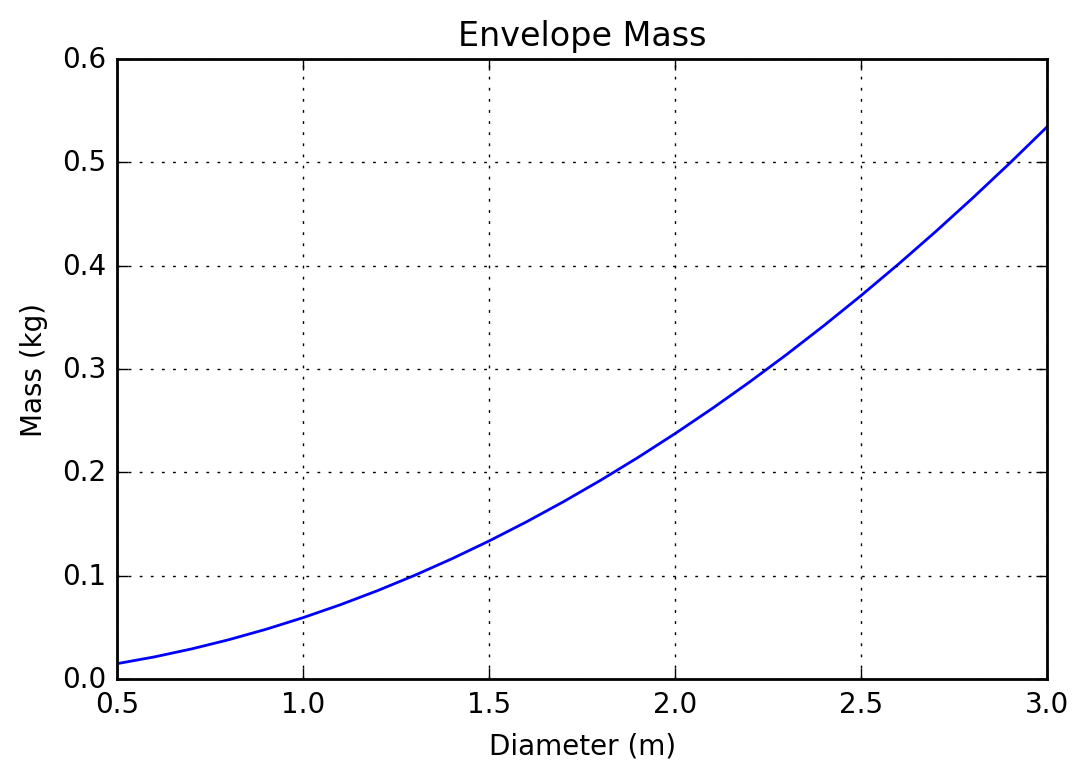

In [206]:
plt.plot(Xvalues, Mass)
plt.title('Envelope Mass')
plt.xlabel('Diameter (m)')
plt.ylabel('Mass (kg)')
plt.grid()
plt.show()

$m=\frac{1}{2}{D^2}l\pi\rho$

$l=40um$

$\rho=945\frac{kg}{m^3}$

## U.S. Standard Atmosphere 1976

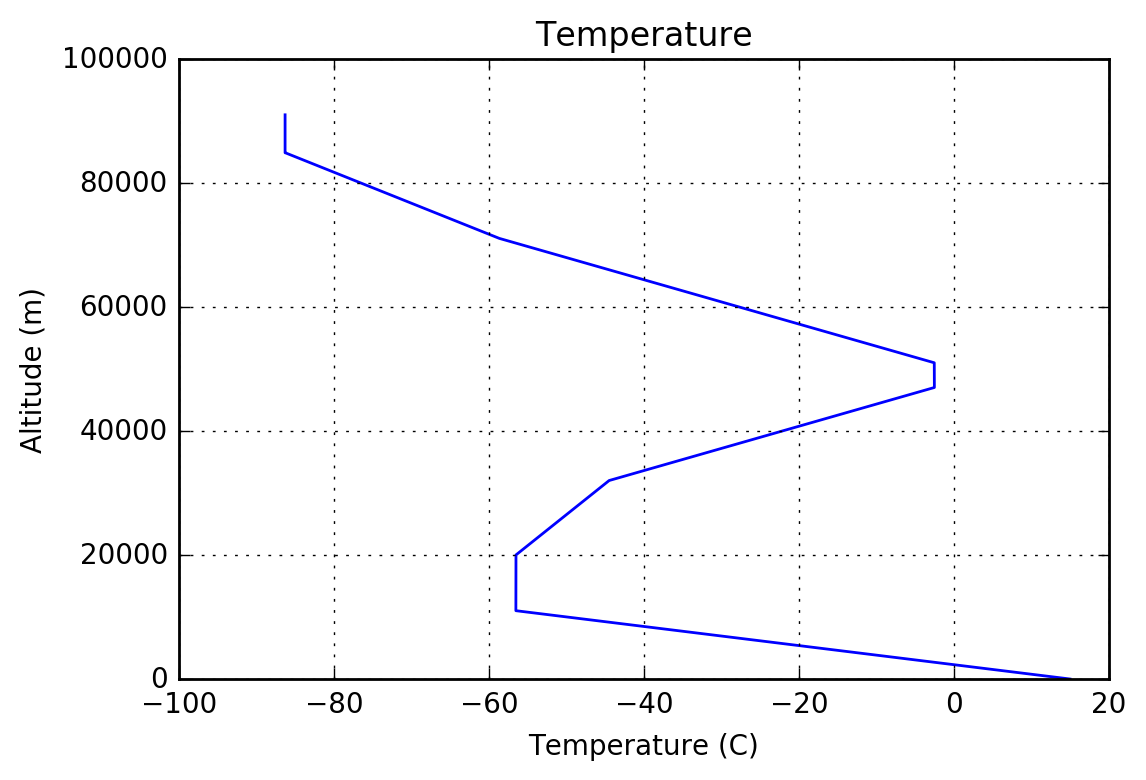

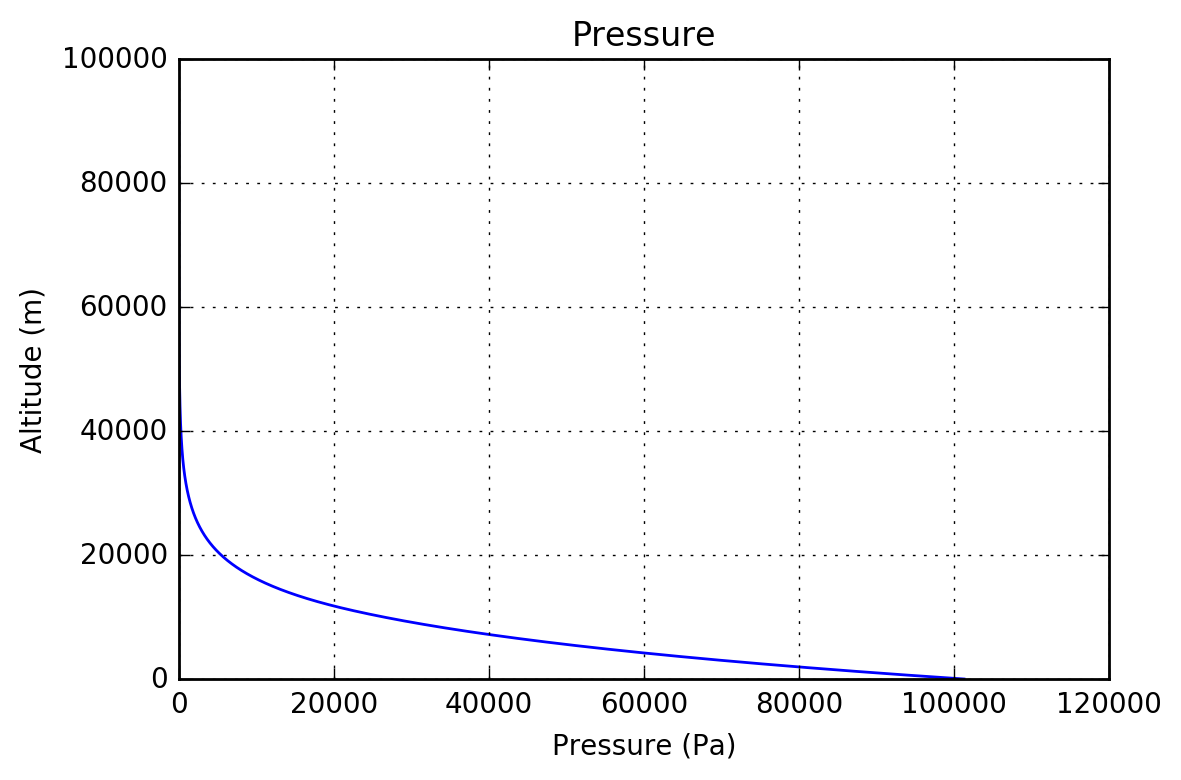

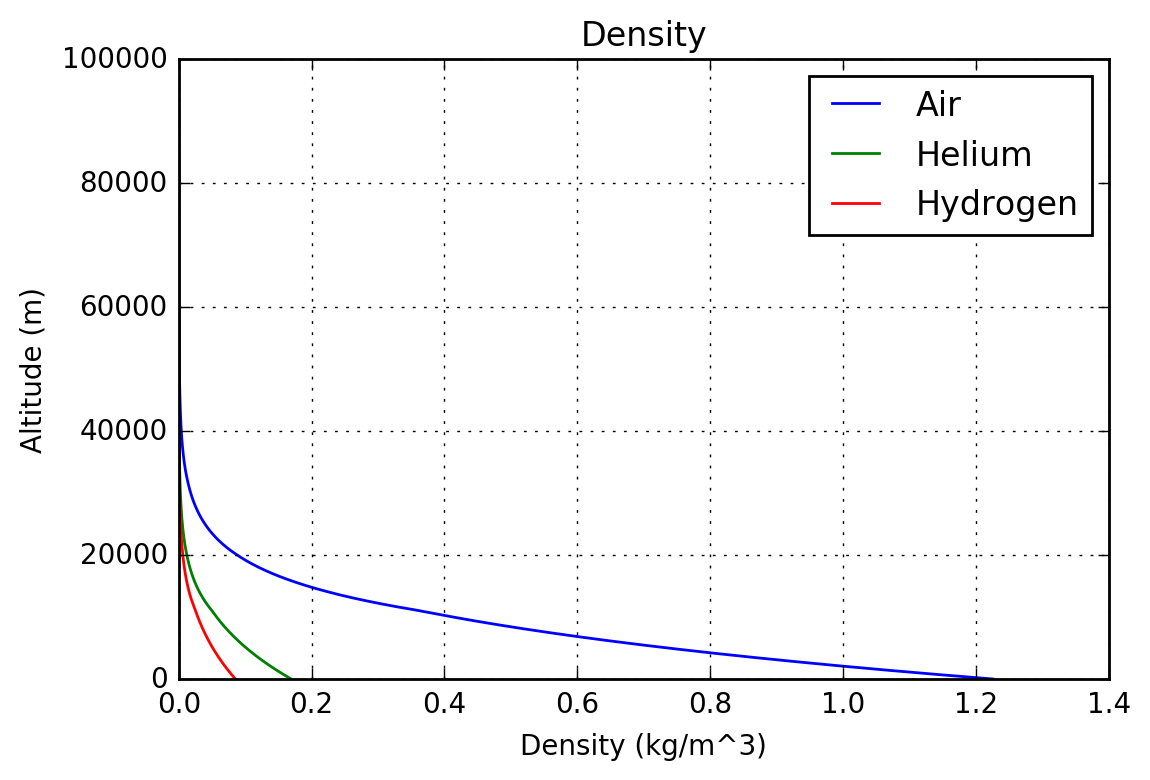

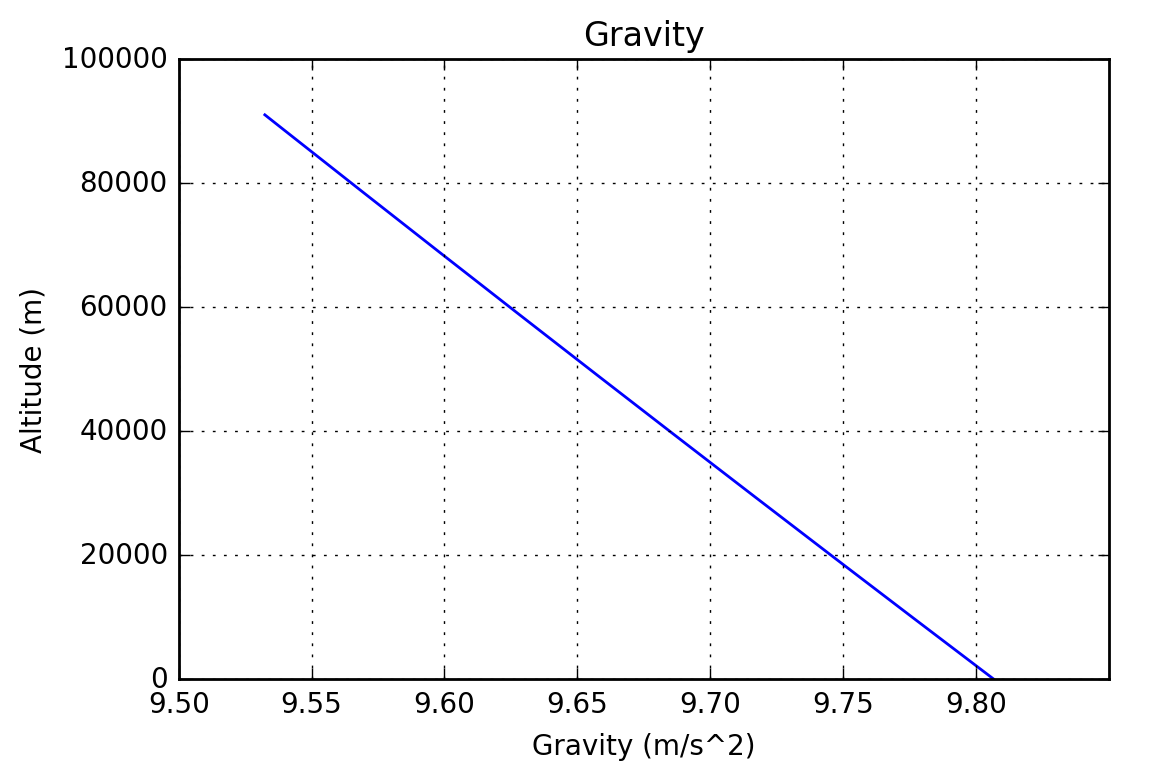

In [207]:
P0 = 101325.0            # Pa
T0 = 15.0                # °C
A0 = 340.294             # m/s
G0 = 9.80665             # m/s^2

Ttp = -56.5              # °C
Tsp = -2.5               # °C
Tmp = -86.28             # °C
a = -0.0065              # °C/m
b = 0.001                # °C/m
c = 0.0028               # °C/m
d = -0.0028              # °C/m
e = -0.002               # °C/m
n = 5.2561
Rair = 286.9             # J/(kg*K)
Rh = 4124                # J/(kg*K)
Rhe = 2077               # J/(kg*K)

maxAlt = 91000
H = np.arange(0,maxAlt,1) # m
T = np.zeros(maxAlt)      # °C
P = np.zeros(maxAlt)      # Pa
Da = np.zeros(maxAlt)     # kg/m^3
Dh = np.zeros(maxAlt)     # kg/m^3
Dhe = np.zeros(maxAlt)    # kg/m^3
G = np.zeros(maxAlt)      # m/s^2

for g in range(0,maxAlt):
    if g == 0:
        G[g] = G0
    else:
        G[g] = G0 * (6371008.8/(6371008.8 + H[g]))**2

for i in range(11000):
    if i == 0:
        T[i] = T0
        P[i] = P0
    else:
        T[i] = T[i-1] + a
        P[i] = P0 * ((T[i] + 273.15) / (T0 + 273.15))**(-G[0] / a / Rair)

for i in range(11000,20000):
    T[i] = Ttp
    P[i] = P[10999] * np.exp(-G[0] / Rair / (Ttp + 273.15) * (H[i] - 10999))

for i in range(20000,32000):
    T[i] = T[i-1] + b
    P[i] = P[19999] * ((T[i] + 273.15) / (Ttp + 273.15))**(-G[0] / b / Rair)

for i in range(32000,47000):
    T[i] = T[i-1] + c
    P[i] = P[31999] * ((T[i] + 273.15) / (T[31999] + 273.15))**(-G[0] / c / Rair)

for i in range(47000,51000):
    T[i] = Tsp
    P[i] = P[46999] * np.exp(-G[0] / Rair / (Tsp + 273.15) * (H[i] - 46999))

for i in range(51000,71000):
    T[i] = T[i-1] + d
    P[i] = P[50999] * ((T[i] + 273.15) / (T[50999] + 273.15))**(-G[0] / d / Rair)

for i in range(71000,84852):
    T[i] = T[i-1] + e
    P[i] = P[70999] * ((T[i] + 273.15) / (T[70999] + 273.15))**(-G[0] / e / Rair)

for i in range(84852,91000):
    T[i] = Tmp
    P[i] = P[84851] * np.exp(-G[0] / Rair / (Tmp + 273.15) * (H[i] - 84851))

for d in range(0,maxAlt):
    Da[d] = P[d] / (Rair * (T[d] + 273.15))
    Dh[d] = P[d] / (Rh * (T[d] + 273.15))
    Dhe[d] = P[d] / (Rhe * (T[d] + 273.15))

plt.plot(T, H)
plt.title('Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Altitude (m)')
plt.grid()
plt.show()

plt.plot(P, H)
plt.title('Pressure')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Altitude (m)')
plt.grid()
plt.show()

plt.plot(Da, H, 'b', label='Air')
plt.plot(Dhe, H, 'g', label='Helium')
plt.plot(Dh, H, 'r', label='Hydrogen')
plt.title('Density')
plt.xlabel('Density (kg/m^3)')
plt.ylabel('Altitude (m)')
plt.legend()
#plt.axis([0,0.2,0,91000])
plt.grid()
plt.show()

plt.plot(G, H)
plt.title('Gravity')
plt.xlabel('Gravity (m/s^2)')
plt.ylabel('Altitude (m)')
plt.grid()
plt.show()

#### 0-11km

$\Delta T = -0.0065\:K/m$

$P=P_0 \big( \frac{T}{T_0} \big)^{\frac{-g}{R \Delta T}}$

$Rair = 287.05 \frac{J}{kgK}$

#### 11-20km

$\Delta T = 0\:K/m$

$P=P_{11km}\; e^{\frac{-g(h-11km)}{R T_{11km}}} $

#### 20-32km

$\Delta T = 0.001\:K/m$

$P=P_{20km} \big( \frac{T}{T_{20km}} \big)^{\frac{-g}{R \Delta T}} $

#### 32-47km

$\Delta T = 0.0028\:K/m$

$P=P_{32km} \big( \frac{T}{T_{32km}} \big)^{\frac{-g}{R \Delta T}}$

#### 47-51km

$\Delta T = 0\:K/m$

$P=P_{47km}\; e^{\frac{-g(h-47km)}{R T_{47km}}}$

#### 51-71km

$\Delta T = -0.0028\:K/m$

$P=P_{51km} \big( \frac{T}{T_{51km}} \big)^{\frac{-g}{R \Delta T}}$

#### 71-84.5km

$\Delta T = -0.002\:K/m$

$P=P_{71km} \big( \frac{T}{T_{71km}} \big)^{\frac{-g}{R \Delta T}}$

#### 84.5-91km

$\Delta T = 0\:K/m$

$P=P_{84.5km}\; e^{\frac{-g(h-84.5km)}{R T_{84.5km}}}$

#### General

$\rho=\frac{P}{R\times{T}}$

$g=g_0 \big(\frac{r}{r + h}\big)^2$


#### Get values

In [208]:
altitude = 42337 # meters

print "Altitude:\t\t{}\tm".format(H[altitude])
print "Temperature:\t\t{0:.2f}\t°C".format(T[altitude])
print "Pressure:\t\t{0:.2f}\tPa".format(P[altitude])
print "Air Density:\t\t{0:.5f}\tkg/m^3".format(Da[altitude])
print "Helium Density:\t\t{0:.5f}\tkg/m^3".format(Dhe[altitude])
print "Hydrogen Density:\t{0:.5f}\tkg/m^3".format(Dh[altitude])
print "Gravity:\t\t{0:.5f}\tm/s^2".format(G[altitude])

Altitude:		42337	m
Temperature:		-15.55	°C
Pressure:		202.08	Pa
Air Density:		0.00273	kg/m^3
Helium Density:		0.00038	kg/m^3
Hydrogen Density:	0.00019	kg/m^3
Gravity:		9.67760	m/s^2


## Balloon Trajectory

In [209]:
EnvelopeVolume = 2.380  # m^3
EnvelopeMass = 0.371    # kg
PayloadMass = 0.020     # kg
FreeLift = 0.015        # kg

GasConstant = 8.314462  # J/molK
Rspecific_Air = 286.9   # J/kgK
MolarMass_Air = 28.97   # g/mol
Density_Air = 1.22565   # kg/m^3 (0m)
Rspecific_H = 4124      # J/kgK
MolarMass_H = 2.016     # g/mol
Density_H = 0.085266675 # kg/m^3 (0m)

Cd = 0.47               # drag coefficient
datapoints = 20000      # s

In [210]:
gas_volume = np.zeros(datapoints)
weight = np.zeros(datapoints)
buoyancy = np.zeros(datapoints)
crossSectionArea = np.zeros(datapoints)
ascentRate = np.zeros(datapoints)
superpressure = np.zeros(datapoints)
freelift = np.zeros(datapoints)
trajectory1 = np.zeros(datapoints)
trajectory2 = np.zeros(datapoints)
trajectory3 = np.zeros(datapoints)
trajectory4 = np.zeros(datapoints)

def modelTrajectory(output, points, bVolume, bMass, pMass, fLift, printOutput, superTemp, stretch):
    
    FullEnvelopeAltitude = 0.0
    timeToFullEnvelope = 0.0
    
    bVolume = bVolume * stretch
    
    RequiredLift = (bMass + pMass + fLift)

    RequiredMass_H = (RequiredLift / (Da[0] - Dh[0]) * P[0]) \
                   / (GasConstant * (T[0] + 273.15)) * (MolarMass_H / 1000)

    RequiredVolume_H = RequiredMass_H / Density_H
    
    for i in range(points):
        
        if i == 0:
            gas_volume[i] = RequiredMass_H * Rh * (T[0] + 273.15 + superTemp) / P[0]
            crossSectionArea[i] = ((gas_volume[i] / np.pi / 4 * 3)**(0.33333))**2 * np.pi
            superpressure[i] = 0
            weight[i] = 0
            buoyancy[i] = 0
            ascentRate[i] = 0
            output[i] = 0
        else:
            pressure = P[int(output[i-1])]
            temperature = T[int(output[i-1])]
            air_density = pressure / (Rair * (temperature + 273.15))
            gravity = G0 * (6371008.8/(6371008.8 + output[i-1]))**2

            gas_volume[i] = RequiredMass_H * Rh * (temperature + 273.15 + superTemp) / pressure

            if gas_volume[i] >= bVolume:
                gas_volume[i] = bVolume
            else:
                FullEnvelopeAltitude = output[i-1]
                timeToFullEnvelope = i

            superpressure[i] = RequiredMass_H * Rh * (temperature + 273.15 + superTemp) \
                             / gas_volume[i] - pressure
            
            crossSectionArea[i] = ((gas_volume[i] / np.pi / 4 * 3)**(0.33333))**2 * np.pi
            weight[i] = gravity * (bMass + pMass + RequiredMass_H)
            buoyancy[i] = air_density * gravity * gas_volume[i]
            freelift[i] = (buoyancy[i] - weight[i]) / gravity

            ascentRate[i] = np.sqrt((2 * abs((buoyancy[i] - weight[i]))) \
                          / (air_density * Cd * crossSectionArea[i]))
            
            if weight[i] > buoyancy[i]:
                ascentRate[i] = ascentRate[i] * (-1)

            output[i] = output[i-1] + ascentRate[i]
            
    if printOutput == True:
        print ""
        print "INPUT: {0:.3f}m^3 {1:.3f}kg {2:.3f}kg {3:.3f}kg Γ{4:.2}" \
              .format(bVolume, bMass, pMass, fLift, stretch)
        print "Full Envelope Altitude:\t{0:.0f}\tm".format(FullEnvelopeAltitude)
        print "Float Altitude:\t\t{0:.0f}\tm".format(output[points-1])
        print "Float Superpressure:\t{0:.0f}\tPa" \
               .format(superpressure[points-1])
        print "Float Supertemperature:\t{0:.2f}\t°C".format(superTemp)
        print "Initial Ascent Rate:\t{0:.2f}\tm/s".format(ascentRate[1])
        print "Time to Full Envelope:\t{0:.0f}\tmin".format(timeToFullEnvelope/60)
        print "Required Lift:\t\t{0:.5f}\tkg".format(RequiredLift)
        print "Required H Mass:\t{0:.5f}\tkg".format(RequiredMass_H)
        print "Required H Volume:\t{0:.5f}\tm^3".format(RequiredVolume_H)


INPUT: 2.380m^3 0.371kg 0.020kg 0.015kg Γ1.0
Full Envelope Altitude:	15343	m
Float Altitude:		15566	m
Float Superpressure:	392	Pa
Float Supertemperature:	0.00	°C
Initial Ascent Rate:	0.92	m/s
Time to Full Envelope:	243	min
Required Lift:		0.40600	kg
Required H Mass:	0.03035	kg
Required H Volume:	0.35600	m^3


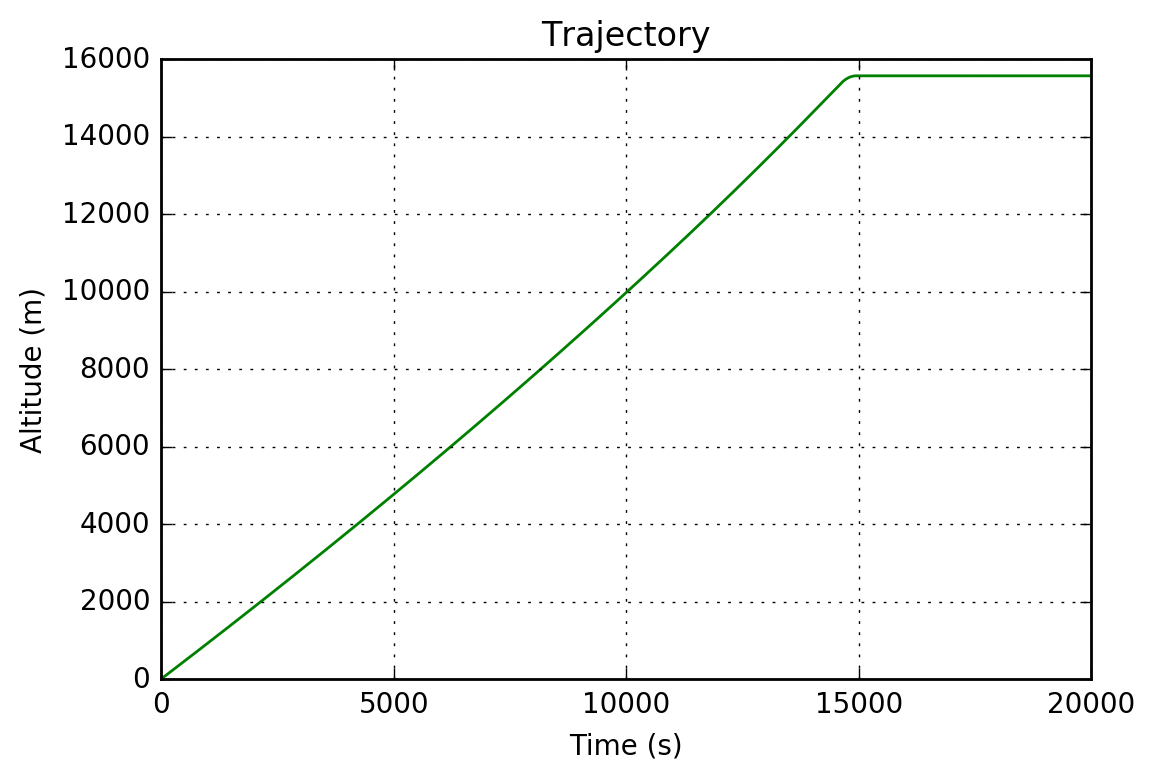

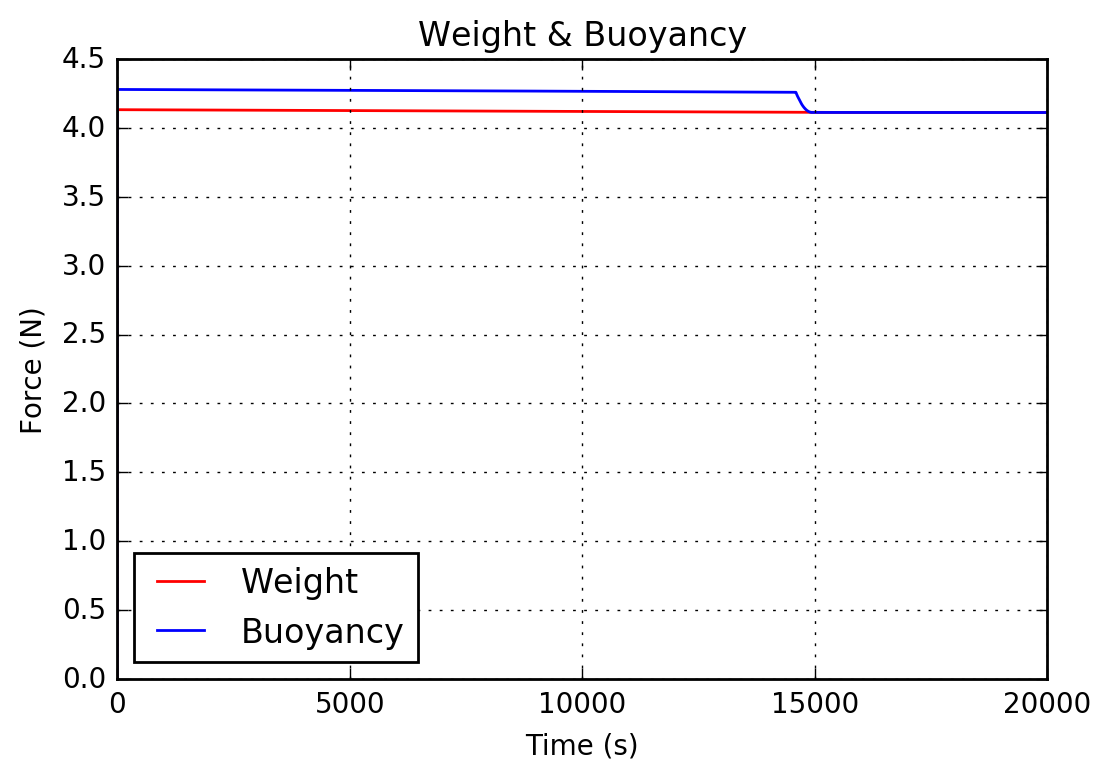

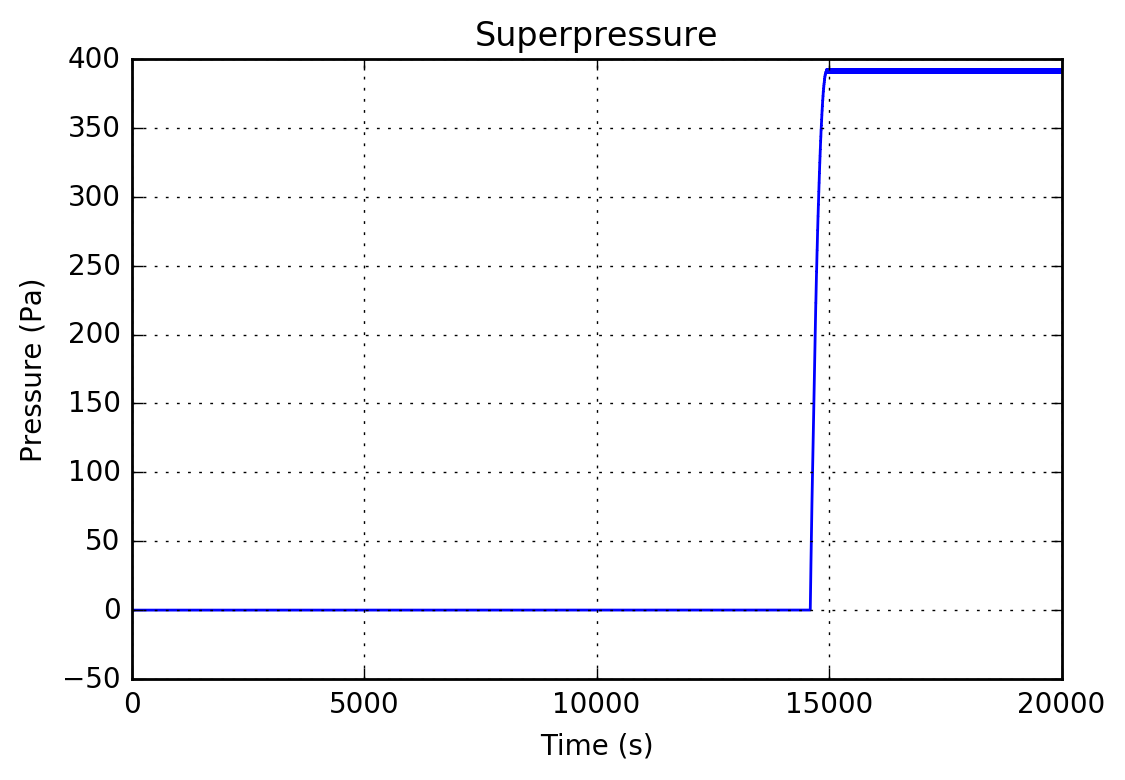

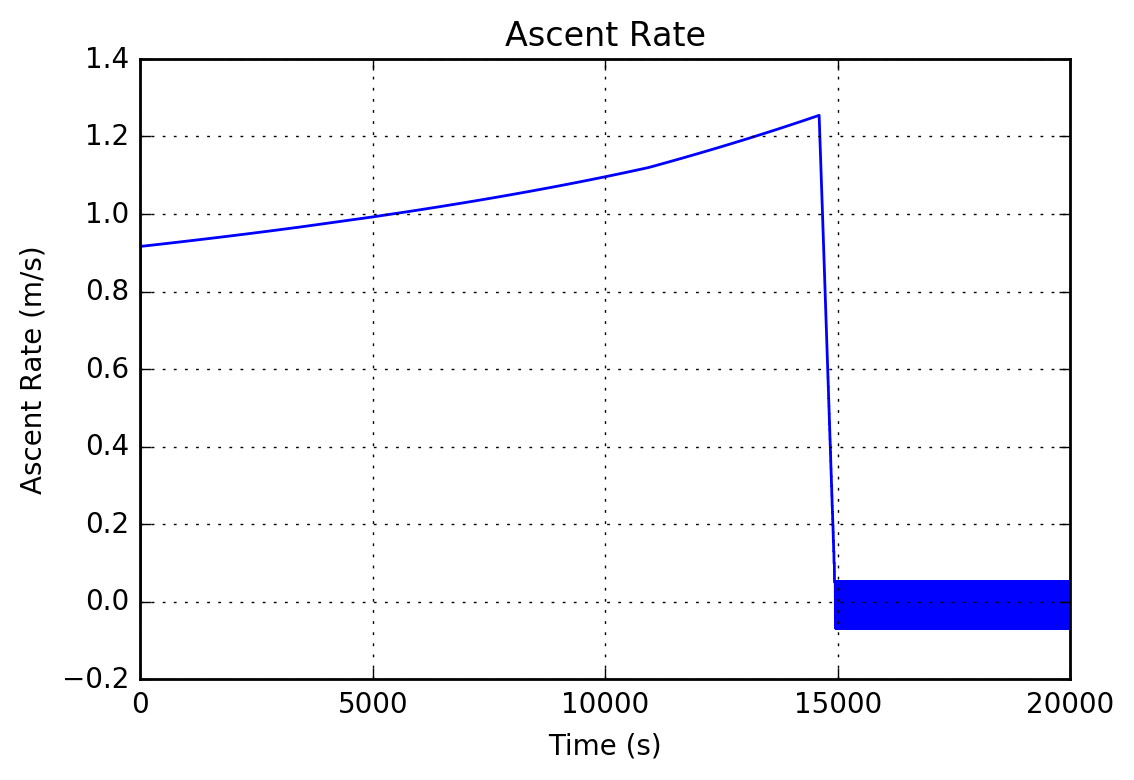

In [211]:
modelTrajectory(trajectory1, datapoints, EnvelopeVolume, EnvelopeMass, PayloadMass, \
                FreeLift, 1, 0, 1.0)

plt.plot(range(datapoints), trajectory1[0:datapoints], 'g')
plt.title('Trajectory')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.grid()
plt.show()

plt.plot(range(datapoints), weight[0:datapoints], 'r', label='Weight')
plt.plot(range(datapoints), buoyancy[0:datapoints], 'b', label='Buoyancy')
plt.title('Weight & Buoyancy')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend(loc=3)
plt.grid()
plt.show()

plt.plot(range(datapoints), superpressure[0:datapoints])
plt.title('Superpressure')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.grid()
plt.show()

plt.plot(range(datapoints), ascentRate[0:datapoints])
plt.title('Ascent Rate')
plt.xlabel('Time (s)')
plt.ylabel('Ascent Rate (m/s)')
plt.grid()
plt.show()

$R_{spec}=\frac{R}{M}$

$PV=nRT=mR_{spec}T$

$F_g=mg$

$B=\rho_{air}Vg$

$F_d=\frac{1}{2}\rho v^2 C_d A$

$v=\sqrt{\frac{2(B-F_g)}{\rho C_d A}}$


INPUT: 2.380m^3 0.371kg 0.020kg 0.020kg Γ1.0
Full Envelope Altitude:	15266	m
Float Altitude:		15560	m
Float Superpressure:	522	Pa
Float Supertemperature:	0.00	°C
Initial Ascent Rate:	1.05	m/s
Time to Full Envelope:	210	min
Required Lift:		0.41100	kg
Required H Mass:	0.03073	kg
Required H Volume:	0.36038	m^3

INPUT: 0.949m^3 0.201kg 0.020kg 0.015kg Γ1.0
Full Envelope Altitude:	12954	m
Float Altitude:		13341	m
Float Superpressure:	982	Pa
Float Supertemperature:	0.00	°C
Initial Ascent Rate:	1.10	m/s
Time to Full Envelope:	175	min
Required Lift:		0.23600	kg
Required H Mass:	0.01764	kg
Required H Volume:	0.20694	m^3

INPUT: 0.117m^3 0.037kg 0.020kg 0.003kg Γ1.0
Full Envelope Altitude:	7657	m
Float Altitude:		8000	m
Float Superpressure:	1445	Pa
Float Supertemperature:	0.00	°C
Initial Ascent Rate:	0.71	m/s
Time to Full Envelope:	168	min
Required Lift:		0.05950	kg
Required H Mass:	0.00445	kg
Required H Volume:	0.05217	m^3


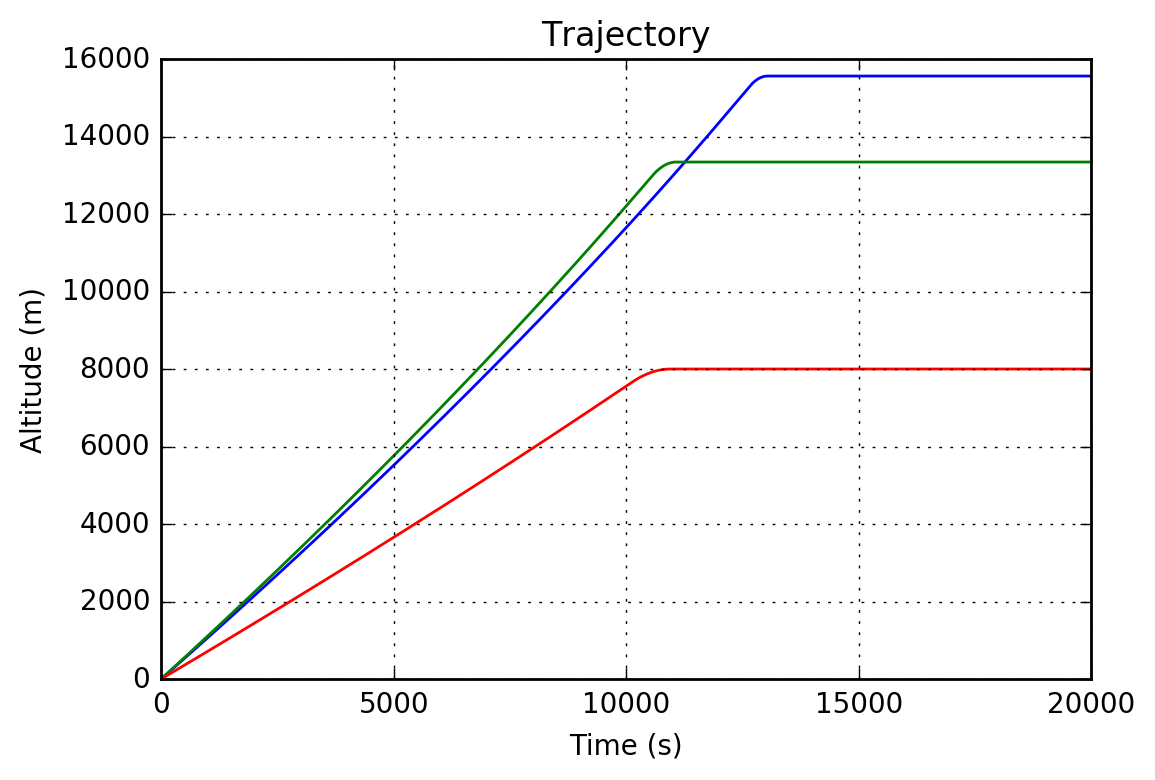

In [212]:
modelTrajectory(trajectory1, datapoints, 2.380, 0.371, 0.020, 0.020, 1, 0, 1.0)
modelTrajectory(trajectory2, datapoints, 0.949, 0.201, 0.020, 0.015, 1, 0, 1.0)
modelTrajectory(trajectory3, datapoints, 0.117, 0.037, 0.020, 0.0025, 1, 0, 1.0)

plt.plot(trajectory1)
plt.plot(trajectory2)
plt.plot(trajectory3)
plt.title('Trajectory')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.grid()
plt.show()

#### Supertemperature Effect

$P_{super}=P_{gas}-P_{air}$

$T_{super}=T_{gas}-T_{air}$

$P_{super}=T_{super}\frac{m_{gas}}{M_{gas}}\frac{R}{V}$


INPUT: 0.949m^3 0.201kg 0.020kg 0.015kg Γ1.0
Full Envelope Altitude:	12954	m
Float Altitude:		13341	m
Float Superpressure:	982	Pa
Float Supertemperature:	0.00	°C
Initial Ascent Rate:	1.10	m/s
Time to Full Envelope:	175	min
Required Lift:		0.23600	kg
Required H Mass:	0.01764	kg
Required H Volume:	0.20694	m^3

INPUT: 0.949m^3 0.201kg 0.020kg 0.015kg Γ1.0
Full Envelope Altitude:	12669	m
Float Altitude:		13341	m
Float Superpressure:	1748	Pa
Float Supertemperature:	10.00	°C
Initial Ascent Rate:	1.37	m/s
Time to Full Envelope:	134	min
Required Lift:		0.23600	kg
Required H Mass:	0.01764	kg
Required H Volume:	0.20694	m^3

INPUT: 0.949m^3 0.201kg 0.020kg 0.015kg Γ1.0
Full Envelope Altitude:	12395	m
Float Altitude:		13341	m
Float Superpressure:	2513	Pa
Float Supertemperature:	20.00	°C
Initial Ascent Rate:	1.58	m/s
Time to Full Envelope:	112	min
Required Lift:		0.23600	kg
Required H Mass:	0.01764	kg
Required H Volume:	0.20694	m^3


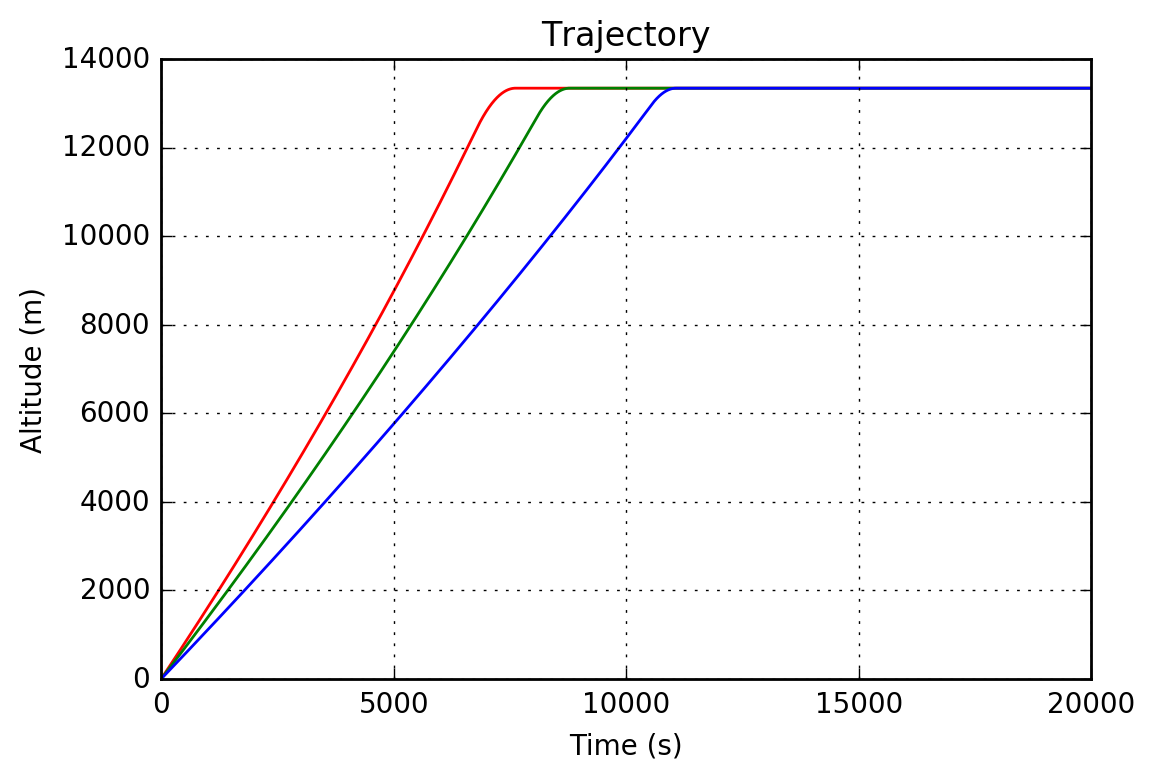

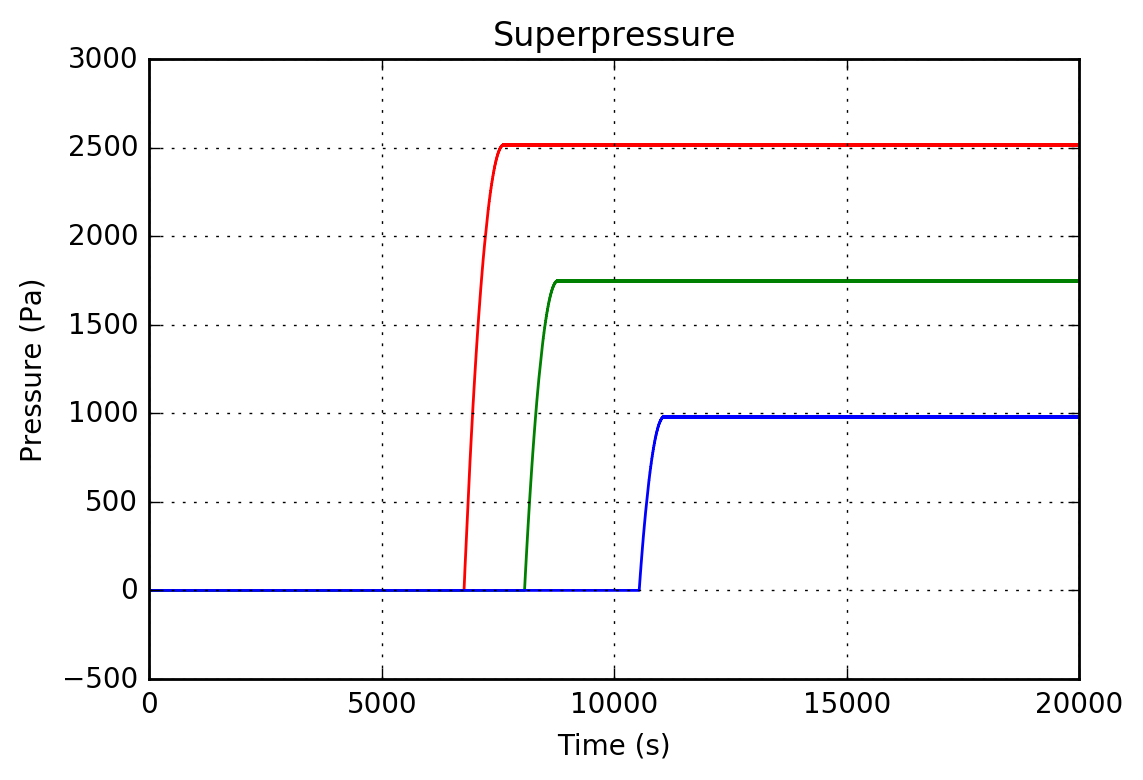

In [213]:
modelTrajectory(trajectory1, datapoints, 0.949, 0.201, 0.020, 0.015, 1, 0, 1.0)
temp1 = np.copy(superpressure)
modelTrajectory(trajectory2, datapoints, 0.949, 0.201, 0.020, 0.015, 1, 10, 1.0)
temp2 = np.copy(superpressure)
modelTrajectory(trajectory3, datapoints, 0.949, 0.201, 0.020, 0.015, 1, 20, 1.0)

plt.plot(trajectory3, 'r-')
plt.plot(trajectory2, 'g-')
plt.plot(trajectory1)
plt.title('Trajectory')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.grid()
plt.show()


plt.plot(superpressure, 'r-')
plt.plot(temp2, 'g-')
plt.plot(temp1)
plt.title('Superpressure')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.grid()
plt.show()

#### Stretching Effect

$V=V_{initial}\;\Gamma$


INPUT: 0.949m^3 0.201kg 0.020kg 0.015kg Γ1.0
Full Envelope Altitude:	12954	m
Float Altitude:		13341	m
Float Superpressure:	982	Pa
Float Supertemperature:	0.00	°C
Initial Ascent Rate:	1.10	m/s
Time to Full Envelope:	175	min
Required Lift:		0.23600	kg
Required H Mass:	0.01764	kg
Required H Volume:	0.20694	m^3

INPUT: 1.139m^3 0.201kg 0.020kg 0.015kg Γ1.2
Full Envelope Altitude:	14110	m
Float Altitude:		14497	m
Float Superpressure:	817	Pa
Float Supertemperature:	0.00	°C
Initial Ascent Rate:	1.10	m/s
Time to Full Envelope:	189	min
Required Lift:		0.23600	kg
Required H Mass:	0.01764	kg
Required H Volume:	0.20694	m^3

INPUT: 1.329m^3 0.201kg 0.020kg 0.015kg Γ1.4
Full Envelope Altitude:	15088	m
Float Altitude:		15474	m
Float Superpressure:	702	Pa
Float Supertemperature:	0.00	°C
Initial Ascent Rate:	1.10	m/s
Time to Full Envelope:	200	min
Required Lift:		0.23600	kg
Required H Mass:	0.01764	kg
Required H Volume:	0.20694	m^3


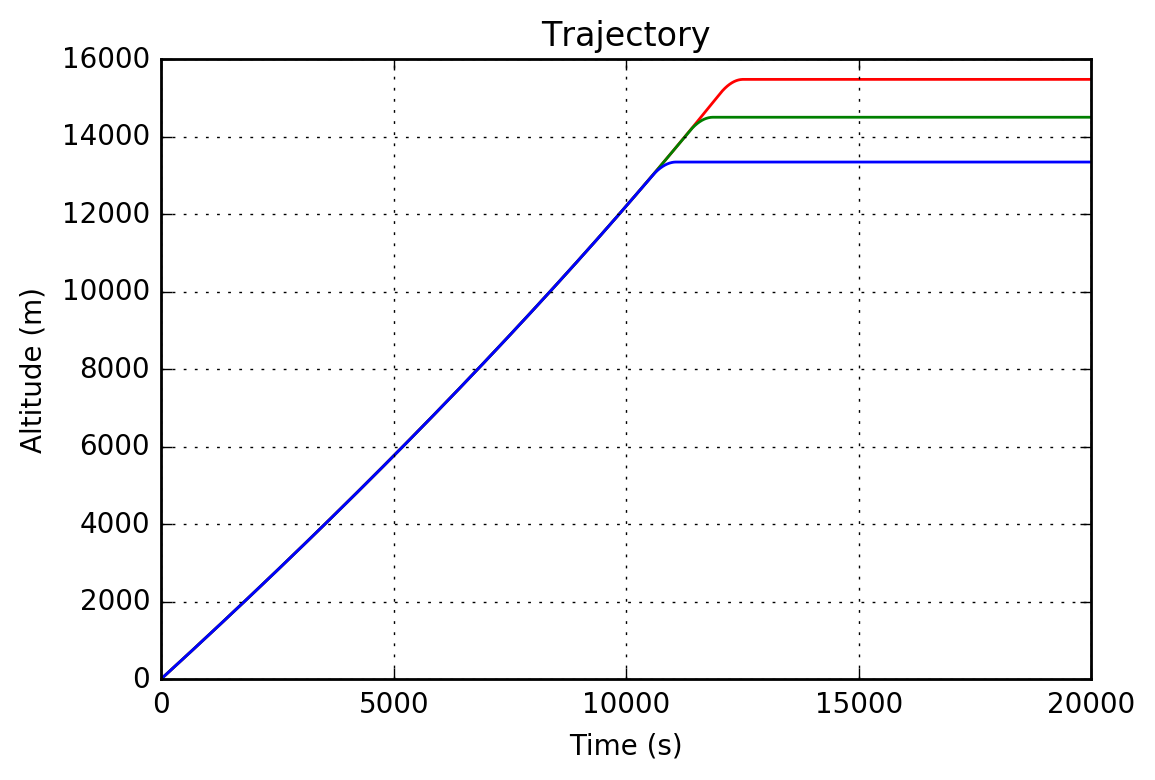

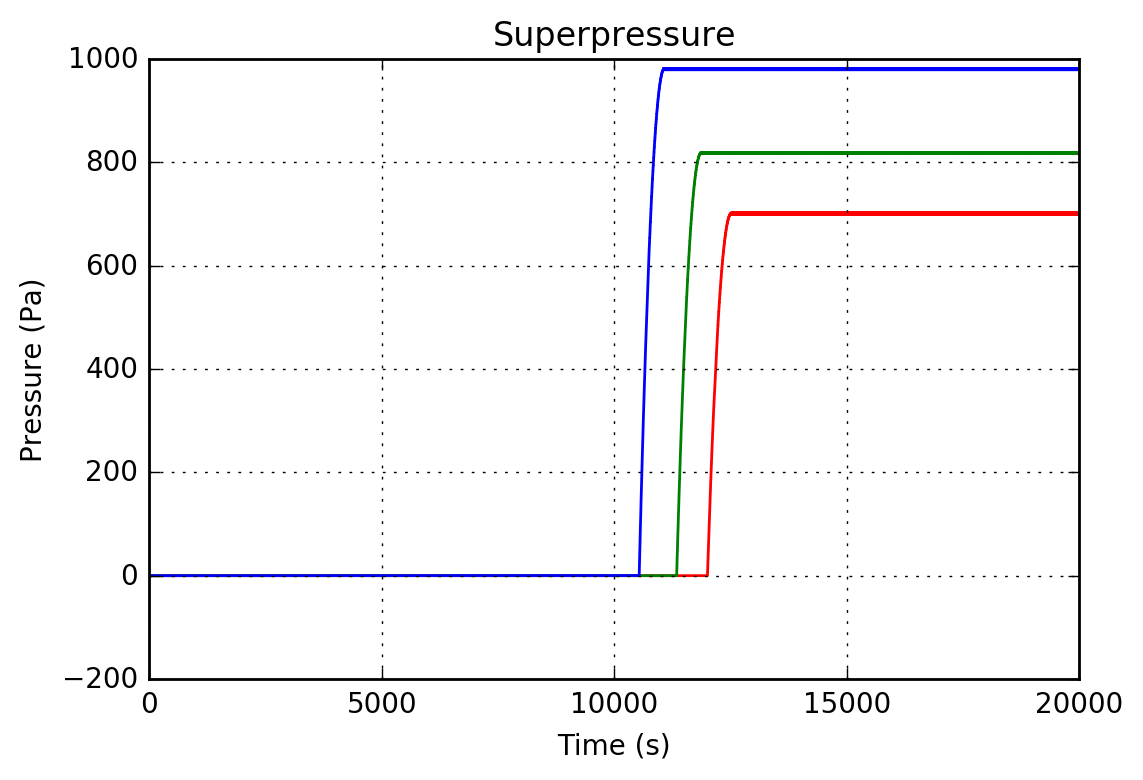

In [214]:
modelTrajectory(trajectory1, datapoints, 0.949, 0.201, 0.020, 0.015, 1, 0, 1.0)
temp1 = np.copy(superpressure)
modelTrajectory(trajectory2, datapoints, 0.949, 0.201, 0.020, 0.015, 1, 0, 1.2)
temp2 = np.copy(superpressure)
modelTrajectory(trajectory3, datapoints, 0.949, 0.201, 0.020, 0.015, 1, 0, 1.4)
temp3 = np.copy(superpressure)

plt.plot(trajectory3, 'r-')
plt.plot(trajectory2, 'g-')
plt.plot(trajectory1)
plt.title('Trajectory')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.grid()
plt.show()

plt.plot(temp3, 'r-')
plt.plot(temp2, 'g-')
plt.plot(temp1)
plt.title('Superpressure')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.grid()
plt.show()